### Data Collection

#### Find Link 

In [1]:
import bs4 as bs
import urllib.request

import pandas as pd


def init_soup(url):
    hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
           'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
           'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
           'Accept-Encoding': 'none',
           'Accept-Language': 'en-US,en;q=0.8',
           'Connection': 'keep-alive'}
    request=urllib.request.Request(url,None,hdr)
    source = urllib.request.urlopen(request).read()
    soup = bs.BeautifulSoup(source,'lxml')
    return soup

def store_url(url):
    soup = init_soup(url)
    links = soup.find_all("a", {"class": "gtm-ad-item"})
#     print(len(links))
    list = []
    for link in links:
#         print(link['href'])
        list.append("https://bikroy.com"+link['href'])
    return list


def main():
    all_url = []
    for x in range(59,100):
        new_urls = store_url("https://bikroy.com/en/ads/bangladesh/motorbikes-scooters?sort=date&order=desc&buy_now=0&urgent=0&page="+(str)(x))
        all_url.extend(new_urls)
        print(x,end=' ')
    
    
    df = pd.DataFrame({'col':all_url})
#     print (df)
    df.to_csv('file.csv')
    print("OK")




# main()

## Collect data from Link 

In [2]:
def store_data(url):
    soup = init_soup(url)
    
    title = soup.find("h1",{"class": "title--3s1R8"})
    price = soup.find("div",{"class": "amount--3NTpl"})
    links = soup.find_all("div", {"class": "value--1lKHt"})
    list = []
    list.append(url)
    list.append(title.text)
    
    if(len(links)==7):
        list.append(links[0].text)
        list.append(links[1].text)
        list.append(links[2].text)
        list.append(".")
        list.append(links[3].text)
        list.append(links[4].text)
        list.append(links[5].text)
        list.append(links[6].text)
        
    elif(len(links)==8):
        list.append(links[0].text)
        list.append(links[1].text)
        list.append(links[2].text)
        list.append(links[3].text)
        list.append(links[4].text)
        list.append(links[5].text)
        list.append(links[6].text)
        list.append(links[7].text)
    list.append(price.text)
        
    return list

In [3]:
store_data("https://bikroy.com/en/ad/bajaj-pulsar-2019-for-sale-dhaka-713")

['https://bikroy.com/en/ad/bajaj-pulsar-2019-for-sale-dhaka-713',
 'Bajaj Pulsar . 2019',
 'Motorcycle',
 'Bajaj',
 'Pulsar',
 '.',
 '2019',
 'Used',
 '150 cc',
 '4,100 km',
 'Tk 167,500']

In [7]:
def save_data():
    all_data = []
    url_file = pd.read_csv("file.csv")
    error_file = open('error_file.txt','w')
    url_list = url_file['col'].tolist()
    cnt = 0
    for url in range(1000,1100):
        try:
            lst = store_data(url_list[url])
            all_data.append(lst)
            print(url, end=' ')
        except:
            error_file.write(url_list[url]+"\n")
    error_file.close()
    df = pd.DataFrame(all_data)
    df.columns =['url','name','bike','brand','model','Trim / Edition','Year of Manufacture','Condition','Engine capacity','Kilometers run','price']
    df.to_csv('dataset2.csv',index=False)
        
    

save_data()

1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099 

# Data Cleaning

In [8]:
df = pd.read_csv('dataset.csv')

df.head()

,url,name,bike,brand,model,Trim / Edition,Year of Manufacture,Condition,Engine capacity,Kilometers run,price
0,https://bikroy.com/en/ad/aprilia-gpr-150-as-li...,Aprilia GPR 150 As-Like New Bike 2021,Motorcycle,Aprilia,GPR 150,As-Like New Bike,2021,Used,150 cc,"2,800 km","Tk 197,000"
1,https://bikroy.com/en/ad/bajaj-aspire-phruk-mo...,Bajaj Aspire ফরুক মোটরস 2017,Motorcycle,Bajaj,Aspire,NaN,2017,Used,150 cc,"22,000 km","Tk 122,000"
2,https://bikroy.com/en/ad/bajaj-ct-100-1-2011-f...,Bajaj CT 100 . 2011,Motorcycle,Bajaj,CT 100,.,2011,Used,100 cc,"26,759 km","Tk 65,000"
3,https://bikroy.com/en/ad/bajaj-discover-100cc-...,Bajaj Discover 100cc 2017,Motorcycle,Bajaj,Discover,100cc,2017,Used,100 cc,"22,500 km","Tk 37,000"
4,https://bikroy.com/en/ad/bajaj-discover-phruk-...,Bajaj Discover ফরুক মোটরস 2015,Motorcycle,Bajaj,Discover,NaN,2015,Used,100 cc,"33,000 km","Tk 58,000"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2063 entries, 0 to 2062
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   url                  2063 non-null   object
 1   name                 2063 non-null   object
 2   bike                 2063 non-null   object
 3   brand                2063 non-null   object
 4   model                2063 non-null   object
 5   Trim / Edition       2028 non-null   object
 6   Year of Manufacture  2063 non-null   int64 
 7   Condition            2063 non-null   object
 8   Engine capacity      2063 non-null   object
 9   Kilometers run       2063 non-null   object
 10  price                2063 non-null   object
dtypes: int64(1), object(10)
memory usage: 177.4+ KB


In [10]:
df.shape

(2063, 11)

In [11]:
df.drop(['url','bike','name','Trim / Edition'],axis=1,inplace=True)

In [13]:
df.head()

,brand,model,Year of Manufacture,Condition,Engine capacity,Kilometers run,price
0,Aprilia,GPR 150,2021,Used,150 cc,"2,800 km","Tk 197,000"
1,Bajaj,Aspire,2017,Used,150 cc,"22,000 km","Tk 122,000"
2,Bajaj,CT 100,2011,Used,100 cc,"26,759 km","Tk 65,000"
3,Bajaj,Discover,2017,Used,100 cc,"22,500 km","Tk 37,000"
4,Bajaj,Discover,2015,Used,100 cc,"33,000 km","Tk 58,000"


In [14]:
df['brand'].value_counts()

Bajaj              459
TVS                353
Yamaha             288
Hero               246
Suzuki             194
Honda              149
Runner              84
Walton              38
Keeway              25
Other brand         18
H Power             17
Mahindra            14
LML                 13
Dayun               13
Dayang              13
Lifan               12
Roadmaster          11
Regal Raptor        11
Dayang Runner       10
Haojue               8
Singer               5
Victor-R             5
Freedom              5
Aprilia              5
Xingfu               5
Zaara                4
Zongshen             4
Emma                 4
Benelli              4
SYM                  4
Pegasus              4
KTM                  3
Beetle Bolt          3
ZNEN                 3
Freedom Runner       3
Power                3
Taro                 3
Hyosung              2
Jialing              2
Green Tiger          2
PHP                  2
Haojin               2
Butterfly            1
Kinlon     

In [41]:
brands = df['brand'].value_counts()
bike_brands_less_than_18 = brands[brands<=18]
bike_brands_less_than_18

Keeway            11
Mahindra           9
Roadmaster         8
H Power            8
LML                8
Other brand        7
Dayang Runner      6
Lifan              6
Dayun              6
Dayang             5
Regal Raptor       4
Aprilia            4
Victor-R           3
Freedom Runner     3
ZNEN               2
PHP                2
Haojin             2
KTM                2
Benelli            2
Xingfu             2
Haojue             2
Singer             2
SYM                2
Beetle Bolt        2
Power              2
Taro               1
Pegasus            1
Vespa              1
Jamuna             1
Zaara              1
Kinlon             1
Emma               1
Butterfly          1
Zongshen           1
Jialing            1
Name: brand, dtype: int64

In [42]:
print("Other brands total",sum(bike_brands_less_than_18))

Other brands total 120


In [43]:
others = bike_brands_less_than_18.keys()
others

Index(['Keeway', 'Mahindra', 'Roadmaster', 'H Power', 'LML', 'Other brand',
       'Dayang Runner', 'Lifan', 'Dayun', 'Dayang', 'Regal Raptor', 'Aprilia',
       'Victor-R', 'Freedom Runner', 'ZNEN', 'PHP', 'Haojin', 'KTM', 'Benelli',
       'Xingfu', 'Haojue', 'Singer', 'SYM', 'Beetle Bolt', 'Power', 'Taro',
       'Pegasus', 'Vespa', 'Jamuna', 'Zaara', 'Kinlon', 'Emma', 'Butterfly',
       'Zongshen', 'Jialing'],
      dtype='object')

In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# df['brand'].replace(others,"Others",inplace=True)
# df['brand'].value_counts().plot(kind="barh")
# plt.gca().invert_yaxis()
# plt.show()

In [45]:
df['model'].value_counts()

Pulsar         126
Apache RTR     106
Other Model     90
Gixxer          82
FZS             58
              ... 
DY100            1
Classic 100      1
M-SLAZ           1
Alpha            1
JH               1
Name: model, Length: 124, dtype: int64

In [55]:
model = df['model'].value_counts()
bike_model_less_than_10 = model[model<=10]
bike_model_less_than_10

Fusion                10
Livo                   9
CD                     9
RX                     9
Passion Pro            9
Rapido                 8
CG125                  8
Avenger 150 Street     7
CBZ Xtrem              7
Other model            7
Radeon 110             6
Turbo 125              6
Hayate                 6
MT 15                  6
KnightRider            6
Name: model, dtype: int64

In [56]:
print("Other brands total",sum(bike_model_less_than_10))

Other brands total 113


In [57]:
others = bike_model_less_than_10.keys()
others

Index(['Fusion', 'Livo', 'CD', 'RX', 'Passion Pro', 'Rapido', 'CG125',
       'Avenger 150 Street', 'CBZ Xtrem', 'Other model', 'Radeon 110',
       'Turbo 125', 'Hayate', 'MT 15', 'KnightRider'],
      dtype='object')

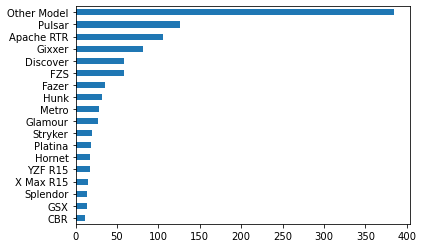

In [58]:
df['model'].replace(others,"Other Model",inplace=True)
df['model'].value_counts().plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

In [59]:
df.head()

,brand,model,Year of Manufacture,Condition,Engine capacity,Kilometers run,price
0,Others,Other Model,2021,Used,150 cc,"2,800 km","Tk 197,000"
1,Bajaj,Other Model,2017,Used,150 cc,"22,000 km","Tk 122,000"
2,Bajaj,Other Model,2011,Used,100 cc,"26,759 km","Tk 65,000"
3,Bajaj,Discover,2017,Used,100 cc,"22,500 km","Tk 37,000"
4,Bajaj,Discover,2015,Used,100 cc,"33,000 km","Tk 58,000"


In [60]:
model = df['model'].value_counts()

In [61]:
model

Other Model    385
Pulsar         126
Apache RTR     106
Gixxer          82
Discover        58
FZS             58
Fazer           35
Hunk            32
Metro           28
Glamour         27
Stryker         20
Platina         19
Hornet          18
YZF R15         17
X Max R15       15
Splendor        14
GSX             14
CBR             11
Name: model, dtype: int64

In [64]:
df.drop('Condition',axis=1,inplace=True)
df.head()

,brand,model,Year of Manufacture,Engine capacity,Kilometers run,price
0,Others,Other Model,2021,150 cc,"2,800 km","Tk 197,000"
1,Bajaj,Other Model,2017,150 cc,"22,000 km","Tk 122,000"
2,Bajaj,Other Model,2011,100 cc,"26,759 km","Tk 65,000"
3,Bajaj,Discover,2017,100 cc,"22,500 km","Tk 37,000"
4,Bajaj,Discover,2015,100 cc,"33,000 km","Tk 58,000"


In [65]:
df['Engine capacity'].value_counts()

150 cc      398
100 cc      156
125 cc      134
160 cc      113
155 cc       90
110 cc       89
80 cc        18
153 cc       14
135 cc       10
165 cc        7
149 cc        7
115 cc        3
102 cc        3
1,500 cc      2
162 cc        2
55 cc         2
163 cc        2
113 cc        1
35 cc         1
5,000 cc      1
106 cc        1
120 cc        1
138 cc        1
12 cc         1
50 cc         1
40 cc         1
1,000 cc      1
59 cc         1
140 cc        1
130 cc        1
250 cc        1
185 cc        1
Name: Engine capacity, dtype: int64

In [15]:
def shape_power(st):
    st = st.strip()
    st = st[:-2]
    ab = st.split(',')
    value = ''.join(ab)
    return int(value)
def shape_run(st):
    st = st.strip()
    st = st[:-3]
    ab = st.split(',')
    value = ''.join(ab)
    return int(value)

def shape_price(st):
    st = st.strip()
    st = st[3:]
    ab = st.split(',')
    value = ''.join(ab)
    return int(value)



In [16]:
x = df['Engine capacity'].apply(shape_power)

In [17]:
df['Engine capacity'] = x

In [18]:
df.head()

,brand,model,Year of Manufacture,Condition,Engine capacity,Kilometers run,price
0,Aprilia,GPR 150,2021,Used,150,"2,800 km","Tk 197,000"
1,Bajaj,Aspire,2017,Used,150,"22,000 km","Tk 122,000"
2,Bajaj,CT 100,2011,Used,100,"26,759 km","Tk 65,000"
3,Bajaj,Discover,2017,Used,100,"22,500 km","Tk 37,000"
4,Bajaj,Discover,2015,Used,100,"33,000 km","Tk 58,000"


In [77]:
stu ="Tk 197,000"
stu[3:]

'197,000'

In [19]:
df['Kilometers run'] = df['Kilometers run'].apply(shape_run)

In [20]:
df.head()

,brand,model,Year of Manufacture,Condition,Engine capacity,Kilometers run,price
0,Aprilia,GPR 150,2021,Used,150,2800,"Tk 197,000"
1,Bajaj,Aspire,2017,Used,150,22000,"Tk 122,000"
2,Bajaj,CT 100,2011,Used,100,26759,"Tk 65,000"
3,Bajaj,Discover,2017,Used,100,22500,"Tk 37,000"
4,Bajaj,Discover,2015,Used,100,33000,"Tk 58,000"


In [21]:
df['price'] = df['price'].apply(shape_price)

In [23]:
df.head()

,brand,model,Year of Manufacture,Condition,Engine capacity,Kilometers run,price
0,Aprilia,GPR 150,2021,Used,150,2800,197000
1,Bajaj,Aspire,2017,Used,150,22000,122000
2,Bajaj,CT 100,2011,Used,100,26759,65000
3,Bajaj,Discover,2017,Used,100,22500,37000
4,Bajaj,Discover,2015,Used,100,33000,58000


In [24]:
df['Engine capacity'].value_counts()

150      768
100      311
125      270
160      200
110      161
155      157
80        31
135       31
153       31
165       21
149       15
102        7
50         7
115        7
163        6
120        3
106        3
140        3
12         2
40         2
1500       2
1000       2
55         2
250        2
162        2
124        1
10000      1
2          1
154        1
1025       1
159        1
180        1
1112       1
86         1
59         1
185        1
35         1
5000       1
113        1
130        1
138        1
1600       1
Name: Engine capacity, dtype: int64

In [25]:
df_filtered = df[(df['Engine capacity'] > 79) & (df['Engine capacity'] < 201)]

In [26]:
df_filtered.head()

,brand,model,Year of Manufacture,Condition,Engine capacity,Kilometers run,price
0,Aprilia,GPR 150,2021,Used,150,2800,197000
1,Bajaj,Aspire,2017,Used,150,22000,122000
2,Bajaj,CT 100,2011,Used,100,26759,65000
3,Bajaj,Discover,2017,Used,100,22500,37000
4,Bajaj,Discover,2015,Used,100,33000,58000


In [27]:
df.shape

(2063, 7)

In [28]:
df_filtered.shape

(2036, 7)

In [29]:
ok = df
df =df_filtered


## One Hot Encoding

In [116]:
cols_to_encode = ['model']
dummies = pd.get_dummies(df[cols_to_encode],drop_first=True)
dummies.sample(10)

,model_CBR,model_Discover,model_FZS,model_Fazer,model_GSX,model_Gixxer,model_Glamour,model_Hornet,model_Hunk,model_Metro,model_Other Model,model_Platina,model_Pulsar,model_Splendor,model_Stryker,model_X Max R15,model_YZF R15
77,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
556,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
368,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
405,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
910,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
706,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
792,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
508,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Feature Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import joblib
# cols_to_scale = ['Kilometers run', 'Engine capacity']
# scale = MinMaxScaler()
# scalled = scale.fit_transform(df[cols_to_scale])

In [119]:
i = 0
for col in cols_to_scale:
    df[col] = scalled[:,i]
    i += 1

C:\Users\BS499\AppData\Local\Temp/ipykernel_14640/1578458817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = scalled[:,i]


In [120]:
df.head()

,brand,model,Year of Manufacture,Engine capacity,Kilometers run,price
0,Others,Other Model,2021,0.666667,0.002800,197000
1,Bajaj,Other Model,2017,0.666667,0.022000,122000
2,Bajaj,Other Model,2011,0.190476,0.026759,65000
3,Bajaj,Discover,2017,0.190476,0.022500,37000
4,Bajaj,Discover,2015,0.190476,0.033000,58000


In [121]:
df.drop('brand',axis=1,inplace=True)
new_df = pd.concat([dummies,df],axis=1)
new_df.shape

C:\Users\BS499\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(1053, 22)

In [122]:
new_df.head()

,model_CBR,model_Discover,model_FZS,model_Fazer,model_GSX,model_Gixxer,model_Glamour,model_Hornet,model_Hunk,model_Metro,...,model_Pulsar,model_Splendor,model_Stryker,model_X Max R15,model_YZF R15,model,Year of Manufacture,Engine capacity,Kilometers run,price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Other Model,2021,0.666667,0.002800,197000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Other Model,2017,0.666667,0.022000,122000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Other Model,2011,0.190476,0.026759,65000
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Discover,2017,0.190476,0.022500,37000
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Discover,2015,0.190476,0.033000,58000


In [123]:
df_transform = pd.get_dummies( new_df )

In [124]:
df_transform.head()

,model_CBR,model_Discover,model_FZS,model_Fazer,model_GSX,model_Gixxer,model_Glamour,model_Hornet,model_Hunk,model_Metro,...,model_Hornet,model_Hunk,model_Metro,model_Other Model,model_Platina,model_Pulsar,model_Splendor,model_Stryker,model_X Max R15,model_YZF R15
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
new_df['model'].value_counts()

Other Model    376
Pulsar         125
Apache RTR     106
Gixxer          82
Discover        58
FZS             57
Fazer           35
Hunk            31
Metro           28
Glamour         27
Stryker         20
Platina         19
Hornet          18
YZF R15         17
X Max R15       15
Splendor        14
GSX             14
CBR             11
Name: model, dtype: int64

In [127]:
new_df.head()

,model_CBR,model_Discover,model_FZS,model_Fazer,model_GSX,model_Gixxer,model_Glamour,model_Hornet,model_Hunk,model_Metro,...,model_Pulsar,model_Splendor,model_Stryker,model_X Max R15,model_YZF R15,model,Year of Manufacture,Engine capacity,Kilometers run,price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Other Model,2021,0.666667,0.002800,197000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Other Model,2017,0.666667,0.022000,122000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Other Model,2011,0.190476,0.026759,65000
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Discover,2017,0.190476,0.022500,37000
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Discover,2015,0.190476,0.033000,58000


In [30]:
ok.head()

,brand,model,Year of Manufacture,Condition,Engine capacity,Kilometers run,price
0,Aprilia,GPR 150,2021,Used,150,2800,197000
1,Bajaj,Aspire,2017,Used,150,22000,122000
2,Bajaj,CT 100,2011,Used,100,26759,65000
3,Bajaj,Discover,2017,Used,100,22500,37000
4,Bajaj,Discover,2015,Used,100,33000,58000


In [31]:
ok['combined']=ok['brand'].astype(str)+' '+ok['model']

In [32]:
ok.head()

,brand,model,Year of Manufacture,Condition,Engine capacity,Kilometers run,price,combined
0,Aprilia,GPR 150,2021,Used,150,2800,197000,Aprilia GPR 150
1,Bajaj,Aspire,2017,Used,150,22000,122000,Bajaj Aspire
2,Bajaj,CT 100,2011,Used,100,26759,65000,Bajaj CT 100
3,Bajaj,Discover,2017,Used,100,22500,37000,Bajaj Discover
4,Bajaj,Discover,2015,Used,100,33000,58000,Bajaj Discover


In [33]:
ok.drop(['brand','model'],axis=1,inplace=True)

In [34]:
cols_to_encode = ['combined']
dummies = pd.get_dummies(ok[cols_to_encode],drop_first=True)
dummies.sample(10)

,combined_Bajaj Aspire,combined_Bajaj Avenger 150 Street,combined_Bajaj Boxer,combined_Bajaj CT 100,combined_Bajaj Caliber,combined_Bajaj Chetak,combined_Bajaj Discover,combined_Bajaj Other Model,combined_Bajaj Platina,combined_Bajaj Pulsar,...,combined_Yamaha SZ RR,combined_Yamaha Saluto,combined_Yamaha Saluto 125,combined_Yamaha X Max R15,combined_Yamaha YZF R15,combined_ZNEN T6,combined_ZNEN T9,combined_Zaara Other Model,combined_Zongshen CG 125,combined_Zongshen ZS
1698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1608,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1597,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1147,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
cols_to_scale = ['Kilometers run', 'Engine capacity']
scale = MinMaxScaler()
scalled = scale.fit_transform(ok[cols_to_scale])

In [38]:
i = 0
for col in cols_to_scale:
    ok[col] = scalled[:,i]
    i += 1

In [39]:
ok.head()

,Year of Manufacture,Condition,Engine capacity,Kilometers run,price,combined
0,2021,Used,0.014803,0.002800,197000,Aprilia GPR 150
1,2017,Used,0.014803,0.022000,122000,Bajaj Aspire
2,2011,Used,0.009802,0.026759,65000,Bajaj CT 100
3,2017,Used,0.009802,0.022500,37000,Bajaj Discover
4,2015,Used,0.009802,0.033000,58000,Bajaj Discover


In [40]:
ok.drop('combined',axis=1,inplace=True)
new_ok = pd.concat([dummies,ok],axis=1)

In [41]:
new_ok.head()

,combined_Bajaj Aspire,combined_Bajaj Avenger 150 Street,combined_Bajaj Boxer,combined_Bajaj CT 100,combined_Bajaj Caliber,combined_Bajaj Chetak,combined_Bajaj Discover,combined_Bajaj Other Model,combined_Bajaj Platina,combined_Bajaj Pulsar,...,combined_ZNEN T6,combined_ZNEN T9,combined_Zaara Other Model,combined_Zongshen CG 125,combined_Zongshen ZS,Year of Manufacture,Condition,Engine capacity,Kilometers run,price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2021,Used,0.014803,0.002800,197000
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2017,Used,0.014803,0.022000,122000
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,2011,Used,0.009802,0.026759,65000
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,2017,Used,0.009802,0.022500,37000
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,2015,Used,0.009802,0.033000,58000


In [42]:
new_ok.drop('Condition',axis=1,inplace=True)

In [43]:
new_df = new_ok

In [44]:
new_df.head()

,combined_Bajaj Aspire,combined_Bajaj Avenger 150 Street,combined_Bajaj Boxer,combined_Bajaj CT 100,combined_Bajaj Caliber,combined_Bajaj Chetak,combined_Bajaj Discover,combined_Bajaj Other Model,combined_Bajaj Platina,combined_Bajaj Pulsar,...,combined_Yamaha YZF R15,combined_ZNEN T6,combined_ZNEN T9,combined_Zaara Other Model,combined_Zongshen CG 125,combined_Zongshen ZS,Year of Manufacture,Engine capacity,Kilometers run,price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2021,0.014803,0.002800,197000
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2017,0.014803,0.022000,122000
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2011,0.009802,0.026759,65000
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2017,0.009802,0.022500,37000
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2015,0.009802,0.033000,58000


In [45]:
x ,y = new_df.drop(['price'],axis=1), new_df['price']
x.shape, y.shape

((2063, 193), (2063,))

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [47]:
x_train.shape, x_test.shape

((1444, 193), (619, 193))

In [48]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [49]:
model.score(x_test,y_test)

0.6711692348448778

In [50]:
model.score(x_train,y_train)

0.8302378617930997

In [51]:
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)

RandomForestRegressor()

In [52]:
rfr_model.score(x_test, y_test)

0.884365488448302

In [53]:
rfr_model.score(x_train, y_train)

0.9836348396409632

In [59]:
import numpy as np
def actual_vs_predicted(model,data,y_true,title=None):
    pred = model.predict(data)
    apdf = pd.DataFrame({'Actual':y_true, 'Predicted':np.round(pred)})
    plt.figure(figsize=(10, 10))
    sns.scatterplot(data=apdf, x='Actual', y='Predicted') 
    plt.title(title)
    plt.show()

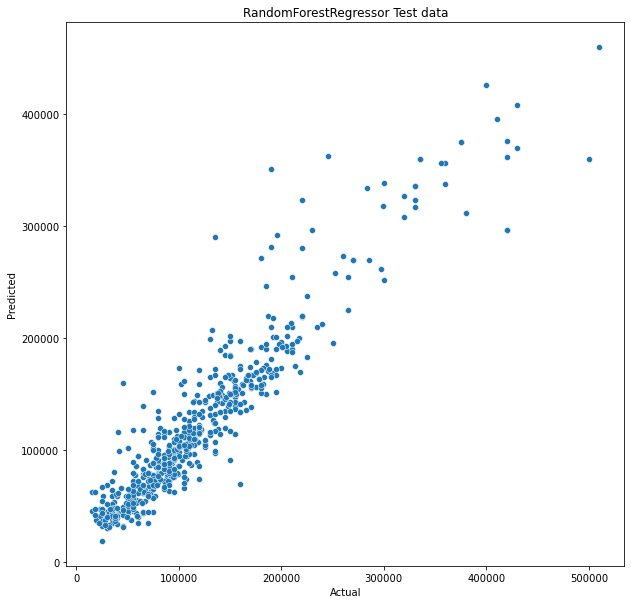

In [60]:
actual_vs_predicted(rfr_model,x_test, y_test, "RandomForestRegressor Test data")

In [61]:
joblib.dump(rfr_model, 'RFR-Model')

['RFR-Model']

In [62]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 04BE-F517

 Directory of C:\Users\BS499\ML LAB

01/15/2022  02:24 PM    <DIR>          .
01/14/2022  12:27 PM    <DIR>          ..
01/14/2022  12:30 PM    <DIR>          .ipynb_checkpoints
01/15/2022  02:04 PM    <DIR>          Data
01/15/2022  02:03 PM           351,607 dataset.csv
01/15/2022  01:59 PM                 0 error_file.txt
01/15/2022  02:24 PM           172,857 Notebook.ipynb
01/15/2022  02:25 PM        10,491,274 RFR-Model
               4 File(s)     11,015,738 bytes
               4 Dir(s)  158,643,257,344 bytes free


In [63]:
!pip install xgboost

In [65]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

In [66]:
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [67]:
xgb_model.score(x_test,y_test)

0.8961312661282476

In [68]:
xgb_model.score(x_train,y_train)

0.9755409461840266